In [1]:
import torch
import os
if "is/sg2" in os.getcwd():
    os.environ["CUDA_VISIBLE_DEVICES"] = "5"
from utils import seed_everything
import numpy as np

if "is/sg2" in os.getcwd():
    HF_CACHE_DIR = '/is/sg2/mkaut/.cache/huggingface/hub'
else:
    HF_CACHE_DIR = '/home/mkaut/.cache/huggingface/hub'


In [ ]:
from diffusers import FluxPipeline, DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", 
                                    torch_dtype=torch.bfloat16,
                                    cache_dir=HF_CACHE_DIR)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
from diffusers import StableDiffusionPipeline,DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                                  cache_dir=HF_CACHE_DIR)
pipe.to("cuda")
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:

prompts_single = "low quality grainy nightvision blurry infrared trail cam photo, the trail cam caught a person sneaking by in the woods, face directly in camera, looks confused at cam"

prompts = [
    " dog",
    " cat",
    " bird",
    " fish",
]

resolution = 512 
seed = 14 # 13 best

seed_everything(seed) # local function to set all available seeds

images = pipe(prompts, 
            generator=torch.Generator("cuda").manual_seed(seed),
            num_inference_steps=50, 
            guidance_scale=2.0,
            height=resolution,
            width=resolution,
            ).images

#display(images[0])


  0%|          | 0/50 [00:00<?, ?it/s]

Unsupported: call_method ConstDictVariable() copy [] {}

from user code:
   File "/is/sg2/mkaut/miniconda3/lib/python3.10/site-packages/diffusers/models/transformers/transformer_flux.py", line 449, in forward
    joint_attention_kwargs = joint_attention_kwargs.copy()

Set TORCH_LOGS="+dynamo" and TORCHDYNAMO_VERBOSE=1 for more information


In [ ]:
len(prompts)

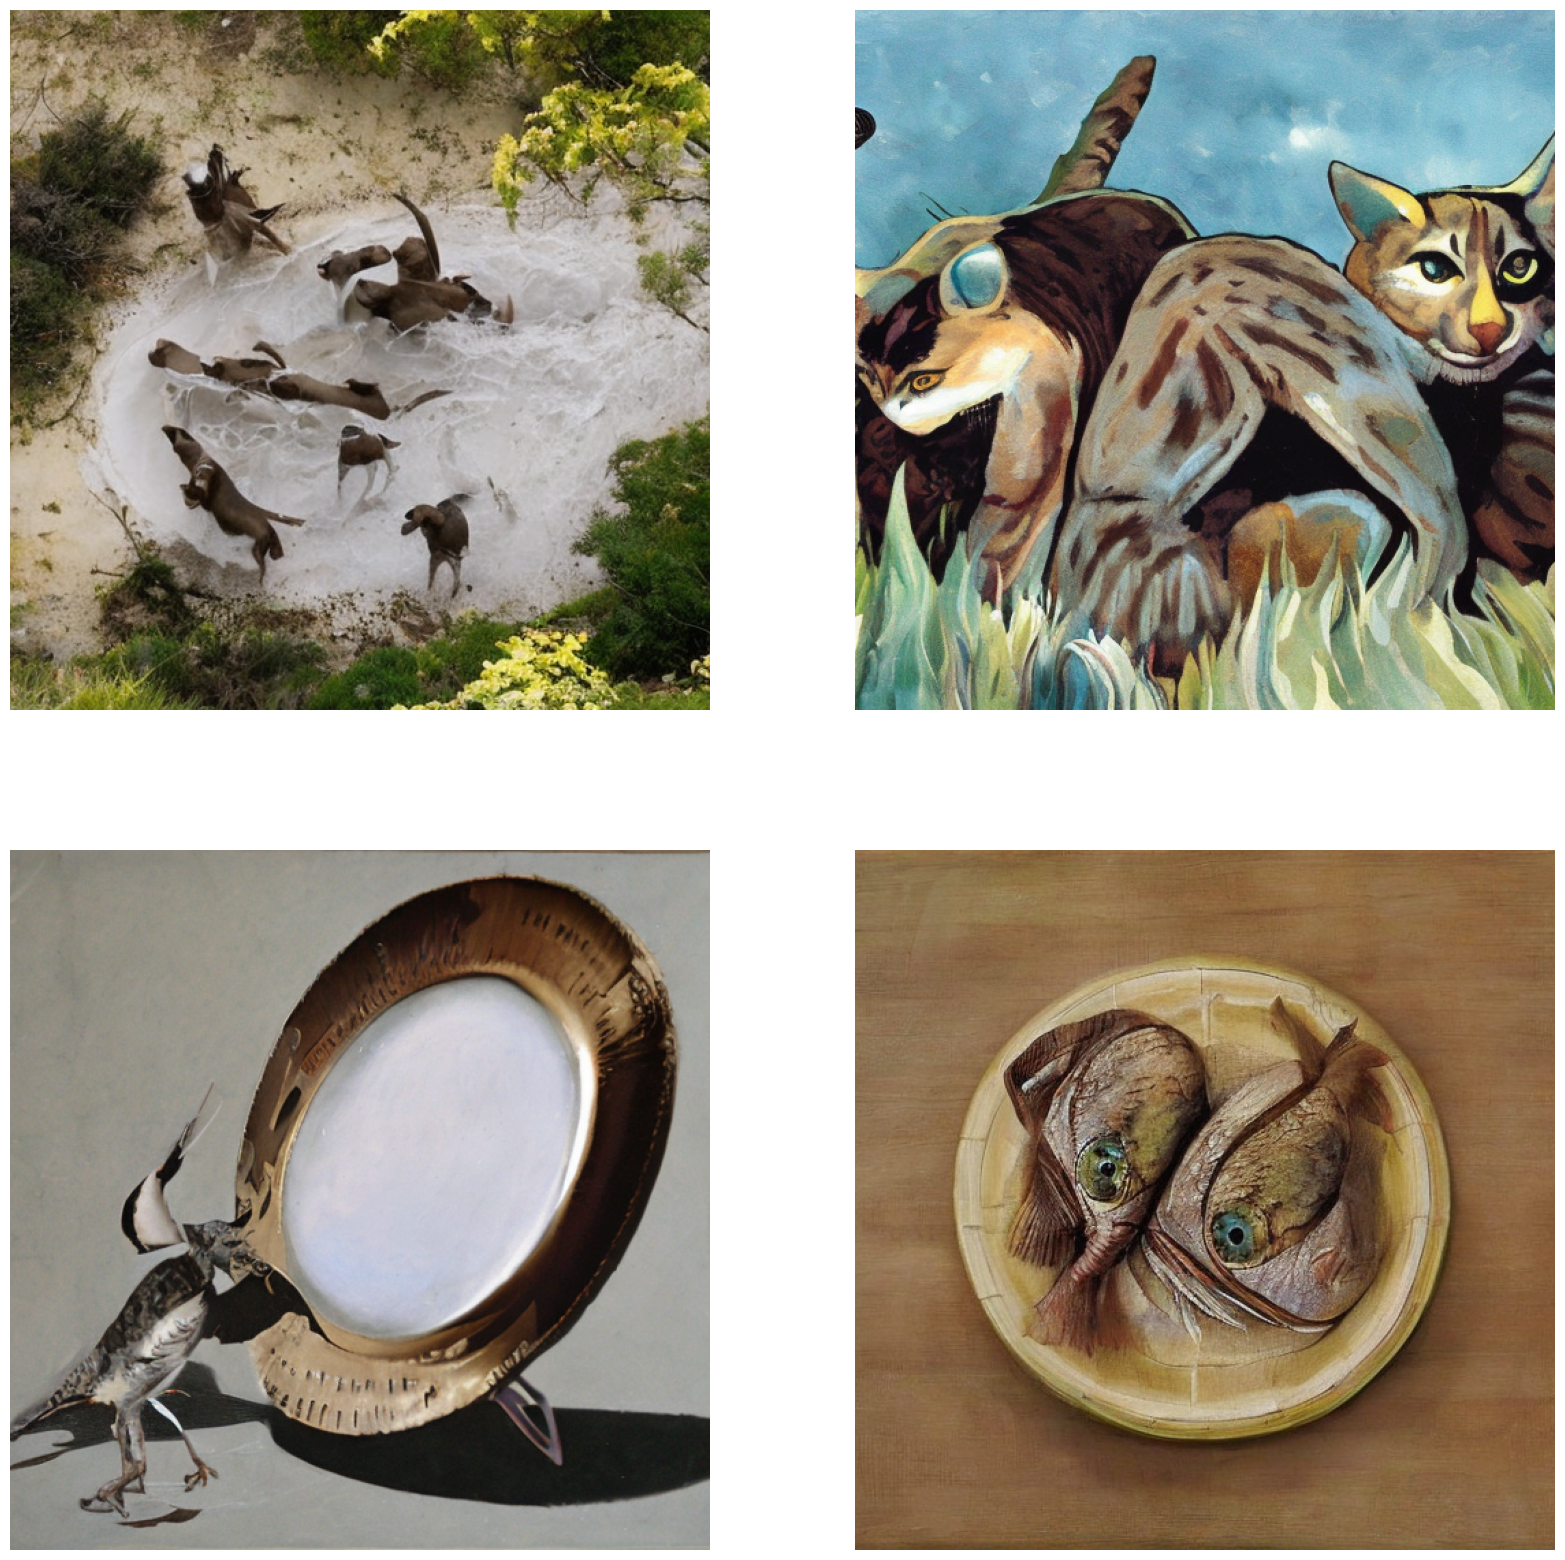

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(int(np.ceil(np.sqrt(len(prompts)))), int(np.ceil(np.sqrt(len(prompts)))), figsize=(20, 20))
for i in range(len(prompts)):
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].imshow(images[i])
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].axis("off")


plt.show()
